In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [66]:
diabetesDS = load_diabetes()
print(diabetesDS.data.shape)
print(diabetesDS.feature_names)


(442, 10)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [67]:
df = pd.DataFrame(diabetesDS.data, columns=diabetesDS.feature_names)
df['target'] = diabetesDS.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [68]:
# split data
X_train, X_test, y_train, y_test = train_test_split(diabetesDS.data, diabetesDS.target, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(353, 10) (89, 10) (353,) (89,)


In [69]:
# Linear Regression Model and load evaluation parameters
mse = mean_squared_error
r2 = r2_score

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

print("Coefficients: \n", lin_reg.coef_)
print("Mean square error: %.2f" % mse(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2(y_test, y_pred))

Coefficients: 
 [ -35.55025079 -243.16508959  562.76234744  305.46348218 -662.70290089
  324.20738537   24.74879489  170.3249615   731.63743545   43.0309307 ]
Mean square error: 3424.26
Coefficient of determination: 0.33


In [70]:
# Ridge model
ridge_reg = Ridge(alpha = 0.5) # just picked alpha equal to 0.3 by random. no significant meaning

# train model
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)

# see outcomes
print("Coefficients: \n", ridge_reg.coef_)
print("Mean square error: %.2f" % mse(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2(y_test, y_pred))


Coefficients: 
 [   8.31129626 -121.63245615  388.91602566  219.54666714  -19.7734407
  -70.82804071 -183.84759267  125.08730279  328.91346442  100.0874327 ]
Mean square error: 3298.89
Coefficient of determination: 0.36


In [71]:
# Lasso model
lasso_reg = Lasso(alpha = 0.5) # just picked alpha equal to 0.3 by random. no significant meaning

# train model
lasso_reg.fit(X_train, y_train)
y_pred = lasso_reg.predict(X_test)

# see outcomes
print("Coefficients: \n", lasso_reg.coef_)
print("Mean square error: %.2f" % mse(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2(y_test, y_pred))


Coefficients: 
 [  0.          -0.         510.17048869  91.03916495  -0.
  -0.         -79.78175471   0.         431.7165515    0.        ]
Mean square error: 3482.88
Coefficient of determination: 0.32


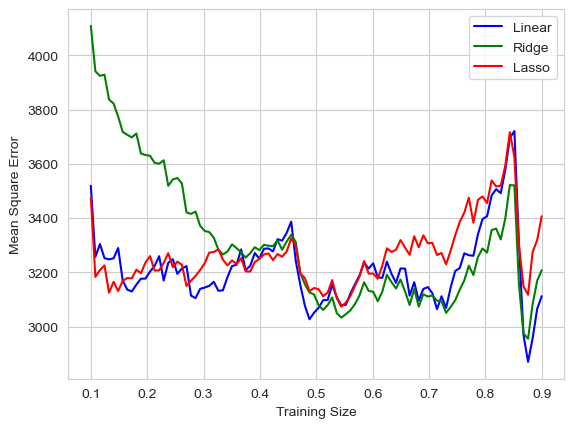

In [77]:
# investigate training size against mean squared error

training_size = np.linspace(0.1,0.9, 100) # increments of 100
lin_score = np.empty(shape=training_size.shape)
ridge_score = np.empty(shape=training_size.shape)
lasso_score = np.empty(shape=training_size.shape)

# loop through training sizes
for idx, val in enumerate(training_size):
    X_train, X_test, y_train, y_test = train_test_split(diabetesDS.data, diabetesDS.target, train_size=val, random_state=0)
    
    # train models
    lin_reg.fit(X_train, y_train)
    ridge_reg.fit(X_train, y_train)
    lasso_reg.fit(X_train, y_train)
    
    # predict values
    lin_pred = lin_reg.predict(X_test)
    ridge_pred = ridge_reg.predict(X_test)
    lasso_pred = lasso_reg.predict(X_test)
    
    # add scores to array
    lin_score[idx] = mse(y_test, lin_pred)
    ridge_score[idx] = mse(y_test, ridge_pred)
    lasso_score[idx] = mse(y_test, lasso_pred)
    


sns.set_style("whitegrid")
sns.lineplot(x=training_size, y=lin_score, color='blue', label="Linear")
sns.lineplot(x=training_size, y=ridge_score, color='green', label="Ridge")
sns.lineplot(x=training_size, y=lasso_score, color='red', label="Lasso")

plt.xlabel("Training Size")
plt.ylabel("Mean Square Error")
plt.show()
